<a href="https://colab.research.google.com/github/msibriani/information_retrieval_eq2/blob/main/Avance4_Equipo2_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

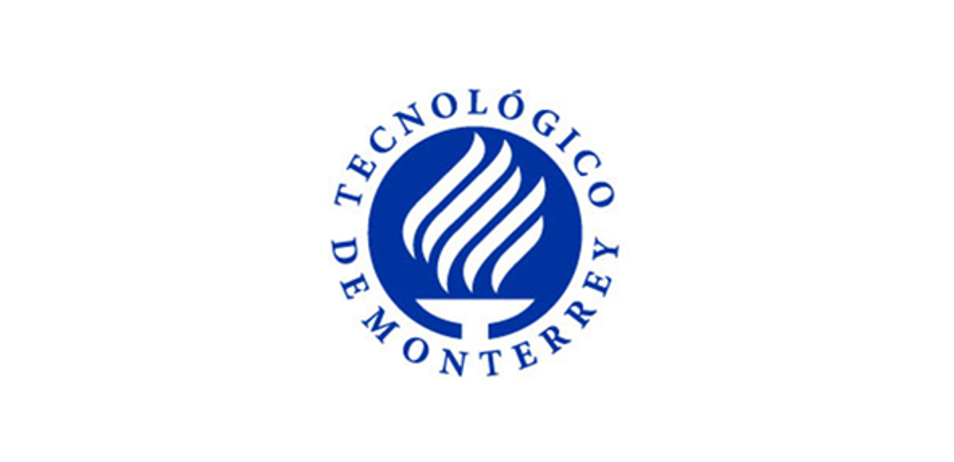

# MNA Maestr√≠a en Inteligencia Artificial Aplicada
# MNA Maestr√≠a en Inteligencia Artificial Aplicada

### Materia: TC5035.10 Proyecto Integrador
¬†(Gpo 10)



### Prof. Titulares:
### Dra. Grettel Barcel√≥ Alonso
### Dr. Luis Eduardo Falc√≥n Morales



### Avance 5. Modelo final.



### EQUIPO 2
### Alumnos - Matr√≠cula
### **Matthias Sibrian Illescas - A01794249**
### **Jos√© Ramiro Ad√°n Charles - A00174646**
### **Genaro Ramos Higuera - A00351269**

### INTRODUCCI√ìN
El jueves 30 de Mayo se llev√≥ a cabo una sesi√≥n con el equipo funcional del Tecnol√≥gico de Monterrey, para obtener una retroalimentaci√≥n sobre las respuestas generadas por el modelo a cada una de las **14 preguntas** definidas para la evaluaci√≥n del mismo.
Por la complejidad de las preguntas, solo 3 de estas fueron evaluadas, y se tiene el acuerdo de incrementar la cantidad en la primer semana de Junio, sin embargo, cabe mencionar que los comentarios fueron positivos y se enfatiz√≥ en la posibilidad de incluir el nombre del documento (archivo) sobre la cual se extraen las respuestas.

Por lo que el siguiente Notebook contiene lo siguiente:
- Se hace una corrida de generaci√≥n de respuestas a las 14 preguntas utilizando el modelo final seleccionado: ***gpt-3.5-turbo de OpenAI***
- Respecto al avance anterior, se a√±aden el nombre del documento pdf como meta-data para incluirlo a cada respuesta como fuente(s) de la misma.
- Como equipo, hacmeos una evaluaci√≥n de las respuestas a 10 de las preguntas usando como referencia las respuestas esperadas (proporciandas por equipo funcional), dando como resultado **8 de 10**.
- Adicionalmente evaluamos el F1-Score utilizando la libreria de BERT-Score que usa la media arm√≥nica de precision y recall de las respuestas esperadas (por el equipo funcional) y las respuestas del modelo, dando un **promedio de 0.6429** en las 10 preguntas.
- Conclusi√≥n al final del Notebook.

###Instalamos librerias de trabajo

In [1]:
pip uninstall -y farm-haystack haystack-ai

Found existing installation: haystack-ai 2.1.2
Uninstalling haystack-ai-2.1.2:
  Successfully uninstalled haystack-ai-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu


In [3]:
!pip3 install haystack-ai
!pip3 install "sentence-transformers>=2.2.0"
!pip3 install pypdf

  Using cached lxml-5.2.2-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.4 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 345.2/345.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 837.8/837.8 kB 36.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.2/8.2 MB 10.1 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.0/295.0 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Cargamos librerias y definimos los metodos para cargar en memoria los documentos y la conversion de los PDFs

In [4]:
from PyPDF2 import PdfReader
from haystack.components.converters import PyPDFToDocument

In [5]:
class CustomPDFToDocument(PyPDFToDocument):
    def _read_pdf(self, file_path, **kwargs):
        pdf_reader = PdfReader(file_path)
        document = super()._read_pdf(file_path, **kwargs)
        document.meta["file_path"] = file_path
        document.meta["file_name"] = file_path.split("/")[-1]
        # Extrae otros metadatos que necesites (autor, t√≠tulo, etc.)
        return document

In [6]:
from haystack.components.writers import DocumentWriter
from haystack.components.converters import PyPDFToDocument
from haystack.components.preprocessors import DocumentSplitter, DocumentCleaner
from haystack.components.routers import FileTypeRouter
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack import Pipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()
file_type_router = FileTypeRouter(mime_types=["application/pdf"])
#Custom function para incluir meta datos como el nombre del archivo pdf.
pdf_converter = CustomPDFToDocument()


Definimos el metodo para limpiar los documentos

In [7]:
document_cleaner = DocumentCleaner()
document_splitter = DocumentSplitter(split_by="word", split_length=200, split_overlap=50)

Agregamos el embedder que utilizaremos en el Pipeline para los documentos que escribiremos en la document store.

In [8]:
#Incluimos los metadatos.
document_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/distiluse-base-multilingual-cased-v2", meta_fields_to_embed=["file_name", "file_path"])
document_writer = DocumentWriter(document_store)


Ahora armamos la secuencia del Pipeline a aplicar a los documentos PDF

In [9]:
preprocessing_pipeline = Pipeline()
preprocessing_pipeline.add_component(instance=file_type_router, name="file_type_router")
preprocessing_pipeline.add_component(instance=pdf_converter, name="pypdf_converter")
preprocessing_pipeline.add_component(instance=document_cleaner, name="document_cleaner")
preprocessing_pipeline.add_component(instance=document_splitter, name="document_splitter")
preprocessing_pipeline.add_component(instance=document_embedder, name="document_embedder")
preprocessing_pipeline.add_component(instance=document_writer, name="document_writer")


Ahora conectamos el Pipeline:

In [10]:
preprocessing_pipeline.connect("file_type_router.application/pdf", "pypdf_converter.sources")
preprocessing_pipeline.connect("pypdf_converter", "document_cleaner")
preprocessing_pipeline.connect("document_cleaner", "document_splitter")
preprocessing_pipeline.connect("document_splitter", "document_embedder")
preprocessing_pipeline.connect("document_embedder", "document_writer")


üöÖ Components
  - file_type_router: FileTypeRouter
  - pypdf_converter: CustomPDFToDocument
  - document_cleaner: DocumentCleaner
  - document_splitter: DocumentSplitter
  - document_embedder: SentenceTransformersDocumentEmbedder
  - document_writer: DocumentWriter
üõ§Ô∏è Connections
  - file_type_router.application/pdf -> pypdf_converter.sources (List[Path])
  - pypdf_converter.documents -> document_cleaner.documents (List[Document])
  - document_cleaner.documents -> document_splitter.documents (List[Document])
  - document_splitter.documents -> document_embedder.documents (List[Document])
  - document_embedder.documents -> document_writer.documents (List[Document])

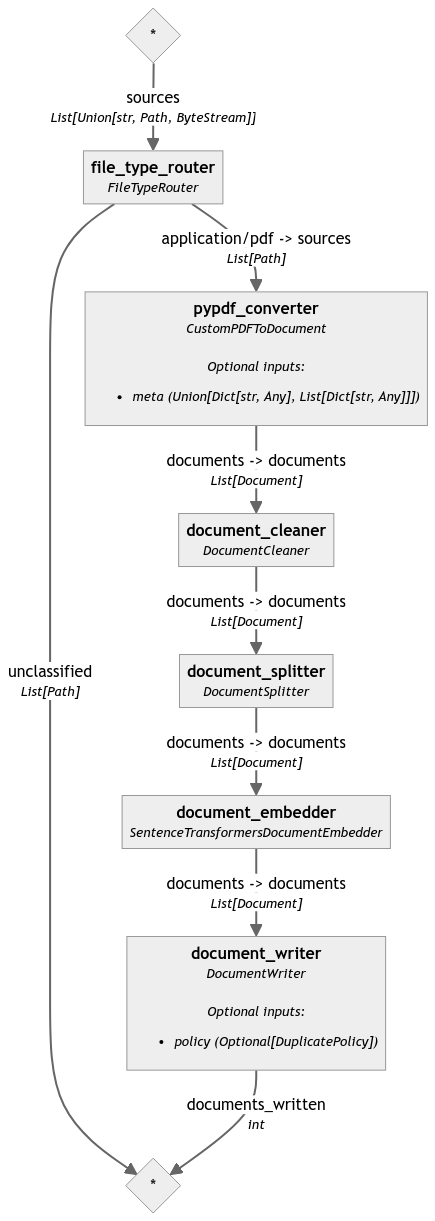

In [11]:
preprocessing_pipeline.show()

###Cargamos todos los documentos de la carpeta de PDFs /content/data/pdf
###y aplicamos el Pipeline de preprocesamiento

In [12]:
from pathlib import Path
#carpeta_pdfs = "/content/data/pdf"
#ESTABLECER EN PATHLIB LA RUTA DE LOS PDFS LOCALES
carpeta_pdfs = "/Users/joseradan/Library/CloudStorage/GoogleDrive-jradanc@gmail.com/Mi unidad/Maestria MNA/Proyecto Integrador/data/pdf"

preprocessing_pipeline.run({"file_type_router": {"sources": list(Path(carpeta_pdfs).glob("**/*"))}})

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/149 [00:00<?, ?it/s]

{'document_writer': {'documents_written': 4765}}

Ahora utilizaremos el mismo embedder para las preguntas (questions) y poder hacer la recuperacion mediante el Retriever.

In [13]:
from haystack.components.embedders import SentenceTransformersTextEmbedder

text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/distiluse-base-multilingual-cased-v2")

In [14]:
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

retriever = InMemoryEmbeddingRetriever(document_store)

Ahora definimos el prompt builder para las preguntas y le decimos que tome el contexto de los documentos para generar las respuestas

In [15]:
from haystack.components.builders import PromptBuilder
#Given the following information, answer the question.
template = """
Create a concise and informative answer for a given question based solely on the given documents.
You must only use information from the given documents and cite the documents you used by mentioning
their file_name or file name and document title in the answers.
For example, finish your answer with "Como se menciona en el documento: "

Context:
{% for document in documents %}
    Content: {{ document.content }}
    Metadata: {{ document.meta }}
{% endfor %}

Question: {{question}}
Answer:
"""

prompt_builder = PromptBuilder(template=template)

Ahora cargamos el API Key para el LLM que utilizaremos:

In [16]:
import os
from getpass import getpass
from haystack.components.generators import OpenAIGenerator

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI API key:")


In [17]:
generator = OpenAIGenerator(model="gpt-3.5-turbo")

In [18]:
basic_rag_pipeline = Pipeline()
# Adicionamos los componentes al pipeline
basic_rag_pipeline.add_component("text_embedder", text_embedder)
basic_rag_pipeline.add_component("retriever", retriever)
basic_rag_pipeline.add_component("prompt_builder", prompt_builder)
basic_rag_pipeline.add_component("llm", generator)

# Ahora los conectamos dentro del pipeline
basic_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
basic_rag_pipeline.connect("retriever", "prompt_builder.documents")
basic_rag_pipeline.connect("prompt_builder", "llm")

üöÖ Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - llm: OpenAIGenerator
üõ§Ô∏è Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

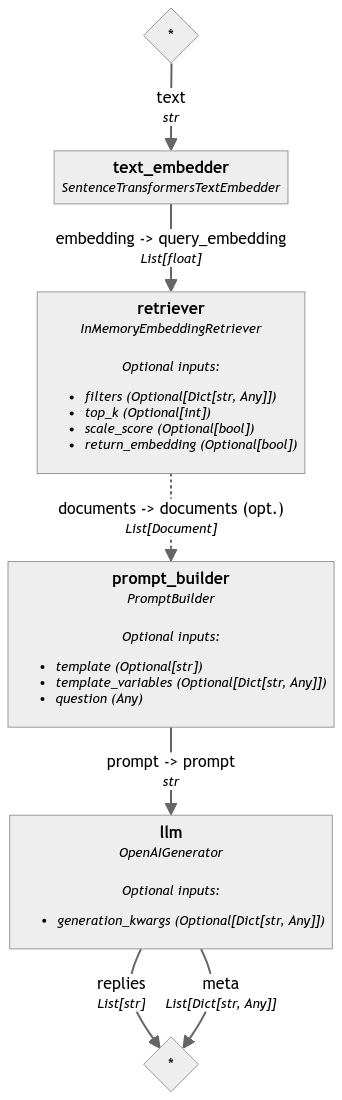

In [19]:
basic_rag_pipeline.show()

## Ahora haremos las siguientes preguntas al LLM y que se base en el contexcto de documentos

1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?
2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?
3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?
4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?
5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?
6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?
7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?
8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?
9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?
10. ¬øCu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?
11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?
12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?
13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?
14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?
15. ¬øQu√© datos son los que se incluyen en el concepto de carga acad√©mica?

In [20]:
question = "1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


En nuestra instituci√≥n, la definici√≥n exacta de un cr√©dito acad√©mico es la siguiente para los 3 niveles:
- En preparatoria, tres cr√©ditos acad√©micos son equivalentes a seis unidades acad√©micas.
- En nivel profesional, tres cr√©ditos acad√©micos son equivalentes a ocho unidades acad√©micas.
- En nivel de posgrado, tres cr√©ditos acad√©micos son equivalentes a doce unidades acad√©micas. 
Como se menciona en el documento "pol√≠ticas_normas_2018_eng.pdf" y "reglamento_becas_preparatoria_profesional_2019_eng.pdf"


In [21]:
question = "2. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante (lecturas, pr√°cticas, estudio independiente, etc.)?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo del estudiante se determina de la siguiente manera:
- Un cr√©dito acad√©mico implica una hora de clase semanal m√°s 180 minutos de trabajo independiente por semana durante al menos 15 semanas (pol√≠ticas_normas_2015_eng.pdf).
- En programas semestrales, una hora de clase semanal corresponde a un cr√©dito acad√©mico. En cursos de laboratorio, dos horas de laboratorio corresponden a un cr√©dito acad√©mico (pol√≠ticas_normas_2015_eng.pdf).
- Para programas de graduados semestrales, los cr√©ditos semestrales se calculan dividiendo el total de unidades del curso por cuatro (politicas_normas_2016_eng.pdf). Como se menciona en el documento: pol√≠ticas_normas_2015_eng.pdf, pol√≠ticas_normas_2016_eng.pdf.


In [41]:
question = "2b. ¬øC√≥mo se determina la equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo independiente del alumno?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La equivalencia de un cr√©dito acad√©mico en t√©rminos de horas de trabajo independiente del alumno se determina en base a las siguientes consideraciones:

- Un cr√©dito acad√©mico implica una hora de clase semanal m√°s 180 minutos de trabajo independiente por semana a lo largo de al menos 15 semanas (Documento: politicas_normas_2016_eng.pdf).
- En programas de posgrado semestrales, los cr√©ditos se calculan dividiendo el n√∫mero total de unidades del curso entre cuatro (Documento: politicas_normas_2016_eng.pdf).
- En programas de postgrado trimestrales, los cr√©ditos se calculan dividiendo el n√∫mero total de unidades entre cuatro y multiplic√°ndolos por 0.75 debido a la diferencia en la duraci√≥n de los per√≠odos acad√©micos (Documento: politicas_normas_2016_eng.pdf).
- Para residen-cias m√©dicas y programas acad√©micos en el √°rea de la salud, una hora de clase semanal equivale a un cr√©dito acad√©mico, dos horas de trabajo de laboratorio corresponden a un cr√©dito acad√©mico y cinc

In [22]:
question = "3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Para la asignaci√≥n de cr√©ditos acad√©micos, estamos siguiendo las normativas establecidas en el "Reglamento para alumnos de programas internacionales en el extranjero" y en las "Pol√≠ticas y Normas Acad√©micas Generales", las cuales contienen directrices relacionadas con la aplicaci√≥n, participaci√≥n y proceso de transferencia de cr√©ditos para unidades educativas estudiadas en instituciones internacionales. Como se menciona en el documento "Correo_Oficial_ITESM_0085_ED_071_Anexo1" y "politicas_normas_eng": 


In [23]:
uestion = "4. ¬øCu√°l es el proceso para evaluar y asignar cr√©ditos a un nuevo curso o programa acad√©mico?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Para la asignaci√≥n de cr√©ditos acad√©micos, seguimos las normativas establecidas en el "Reglamento para alumnos de programas internacionales en el extranjero" y en las "Pol√≠ticas y Normas Acad√©micas Generales". Estos documentos establecen directrices relacionadas con la aplicaci√≥n, participaci√≥n y proceso de transferencia de cr√©ditos para unidades educativas estudiadas en instituciones extranjeras, as√≠ como para cursos tomados en el extranjero en el marco de programas internacionales. (Documento: Correo_Oficial_ITESM_0085_ED_071_Anexo1.pdf, Documento: politicas_normas_eng.pdf) Como se menciona en los documentos: "Article 170 Award of credit for the courses in the curriculum of a student who participates in an international program is based on the guidelines stipulated in the Regulations for Managing and Operating International Programs."


In [24]:
question = "5. ¬øC√≥mo se aseguran los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Para asegurar los est√°ndares de calidad y coherencia en la asignaci√≥n de cr√©ditos a trav√©s de diferentes departamentos y programas, se deben seguir ciertos lineamientos y normas acad√©micas. Por ejemplo, los programas de doble titulaci√≥n deben garantizar que los resultados de aprendizaje sean comparables a los del programa tradicional (Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf). Adem√°s, se establece que los cr√©ditos acad√©micos se calculan de manera espec√≠fica para cada nivel de estudios, dependiendo de la duraci√≥n de los periodos acad√©micos (Correo_Oficial_ITESM_0353_ED_256.pdf). Asimismo, se menciona la importancia de evaluar y dar seguimiento a los cursos impartidos por universidades extranjeras para asegurar la calidad y coherencia de los mismos (Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf).

Como se menciona en los documentos "Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf" y "Correo_Oficial_ITESM_0353_ED_256.pdf", los est√°ndares de calidad y coherencia en la asignaci√≥n

In [25]:
question = "6. ¬øC√≥mo se calcula la carga de trabajo del estudiante para determinar el n√∫mero de cr√©ditos de un curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La carga de trabajo del estudiante se determina seg√∫n el n√∫mero de unidades asignadas a un curso, las cuales se calculan en funci√≥n de las horas de trabajo que el curso requiere por semana. En el caso de programas de atenci√≥n m√©dica con actividades cl√≠nicas, la carga acad√©mica se mide por el tiempo total por semana que el curso requiere de los estudiantes. Cada curso se asigna un n√∫mero dado de unidades, las cuales se determinan de manera que el total de unidades para los cursos en un semestre de un plan de estudios sea similar a los de un semestre de los planes de licenciatura, maestr√≠a y doctorado (Archivo: politicas_normas_2018_eng.pdf). Como se menciona en el documento: politicas_normas_2018_eng.pdf


In [26]:
question = "7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

S√≠, se considera la carga de trabajo fuera del aula, como tareas y proyectos, al asignar cr√©ditos. Seg√∫n lo mencionado en el documento "Correo_Oficial_ITESM_0484_Anexo.pdf" bajo la secci√≥n CA: Cr√©ditos acad√©micos, se establece que las horas dedicadas al trabajo independiente del alumno tambi√©n forman parte de la asignaci√≥n de cr√©ditos acad√©micos. Se menciona que a cada hora de clase se deben asignar tres horas de trabajo independiente del alumno para cumplir con los objetivos del curso. Como se menciona en el documento: "Correo_Oficial_ITESM_0484_Anexo.pdf"


In [27]:
question = "8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes a trav√©s del reglamento de becas y pr√©stamos para estudiantes de preparatoria y profesional. Seg√∫n el documento, los cursos son asignados con un n√∫mero de unidades que es menor al n√∫mero total de horas de trabajo por semana que requiere el curso. Adem√°s, se establece que un cr√©dito acad√©mico incluye un cierto n√∫mero de horas dedicadas a actividades acad√©micas. Como se menciona en el documento "reglamento_becas_preparatoria_profesional_eng.pdf".


In [28]:
question = "9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

La comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional se garantiza a trav√©s de la traducci√≥n de la escala de calificaciones de las universidades extranjeras a su equivalente con el Sistema Tecnol√≥gico de Monterrey, como se menciona en el documento "Correo_Sistema_ITESM_467.pdf". Adem√°s, se establece que los alumnos deben ser informados sobre los criterios de calificaci√≥n y carga acad√©mica del programa antes de su partida, y se acuerda que la equivalencia entre cr√©ditos acad√©micos y unidades acad√©micas se define de manera espec√≠fica para cada nivel de estudio y tipo de programa, seg√∫n lo establecido en los documentos "politicas_normas_2010_esp.pdf" y "politicas_normas_esp.pdf". Por lo tanto, la comparabilidad se asegura mediante acuerdos y especificaciones detalladas en los convenios internacionales y normas acad√©micas del Tecnol√≥gico de Monterrey. Como se menciona en los documentos mencionados.


In [29]:
question = "10. Cu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

El proceso para la transferencia de cr√©ditos de otras instituciones en el Tecnol√≥gico de Monterrey implica que los acuerdos de cr√©dito y equivalencia deben ser obtenidos por el estudiante al momento de su admisi√≥n y ser√°n v√°lidos para cualquier otro campus si el estudiante se transfiere despu√©s de completar al menos dos semestres en el campus inicial (pol√≠ticas_normas_2013_eng.pdf, Article 23). Adem√°s, los cursos que se desean transferir deben ser similares en contenido tanto a los de la otra instituci√≥n como a los cursos del Tecnol√≥gico de Monterrey, y deben haber sido aprobados con una calificaci√≥n m√≠nima de 80 sobre 100, adem√°s de cumplir con otras regulaciones establecidas (pol√≠ticas_normas_2017_eng.pdf, Article 14 ; pol√≠ticas_normas_2016_eng.pdf, Article 10). Como se menciona en el documento: pol√≠ticas_normas_2013_eng.pdf, pol√≠ticas_normas_2017_eng.pdf, pol√≠ticas_normas_2016_eng.pdf.


In [30]:
question = "11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Los cr√©ditos acad√©micos afectan el progreso y la planificaci√≥n acad√©mica de los estudiantes al determinar el n√∫mero de cursos que deben aprobar para mantener su beca. Para estudiantes de pre-2019, el n√∫mero de cursos suspendidos equivale al n√∫mero de faltas, mientras que para estudiantes de 2019 en adelante, el n√∫mero de faltas se calcula seg√∫n la cantidad de cr√©ditos acad√©micos fallados en el per√≠odo. Adem√°s, los estudiantes deben obtener un promedio final igual o superior a 85/100 para mantener su beca seg√∫n el programa correspondiente. Como se menciona en el documento "reglamento_becas_preparatoria_profesional_eng_2022_ junio.pdf".


In [31]:
question = "12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan regularmente, como se menciona en el documento "politicas_normas_eng.pdf" en el que se detalla la modificaci√≥n de diferentes art√≠culos y la inclusi√≥n de nuevas pol√≠ticas relacionadas con los cr√©ditos acad√©micos. Como se menciona en el documento: "politicas_normas_eng.pdf" y "politicas_normas_2015_eng.pdf"


In [32]:
question = "13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso, se utilizan los criterios de definir la carga acad√©mica en cr√©ditos acad√©micos y modificar la definici√≥n de carga acad√©mica en cr√©ditos acad√©micos en el Art√≠culo 32, as√≠ como ajustar las horas de dedicaci√≥n por cr√©dito en los programas de posgrado de acuerdo con las horas de sesiones con el profesor y trabajo independiente del estudiante en los programas trimestrales y intensivos mencionados en los cambios de los Programas de Posgrado en el documento "Correo_Oficial_ITESM_0751 (1).pdf". Como se menciona en el documento: "Correo_Oficial_ITESM_0751 (1).pdf"


In [33]:
question = "14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n los documentos proporcionados, el c√°lculo de un cr√©dito acad√©mico implica una clase de 50 minutos m√°s 180 minutos de trabajo independiente por semana durante al menos 15 semanas, lo que equivale a 50 minutos de clase por semana correspondientes a un cr√©dito acad√©mico. Adem√°s, se menciona que para programas graduados semestrales, las horas-cr√©dito por semestre se calculan dividiendo el total de unidades del curso entre cuatro, y para programas trimestrales se multiplica el total de unidades del curso por 0.75 para obtener las horas-cr√©dito equivalentes al semestre. Como se menciona en el documento de "politicas_normas_2016_eng.pdf" y en "Correo_Sistema_ITESM_1453_ED_495_Anexo1.pdf":


In [34]:
question = "15. ¬øQu√© datos son los que se incluyen en el concepto de carga acad√©mica?"

response = basic_rag_pipeline.run({"text_embedder": {"text": question}, "prompt_builder": {"question": question}})

print(response["llm"]["replies"][0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Seg√∫n el documento "politicas_normas_eng.pdf", los datos incluidos en el concepto de carga acad√©mica son las horas de clase por semana, las horas de laboratorio por semana, las horas de aprendizaje supervisado por semana y los cr√©ditos acad√©micos asignados a cada unidad educativa. Esto se menciona en el siguiente fragmento: "La carga acad√©mica debe especificarse en cada curso con la siguiente nomenclatura: C: horas de clase por semana, L: horas de laboratorio por semana, A: horas de aprendizaje supervisado por semana, CA: cr√©ditos acad√©micos. Estas unidades representan el tiempo de trabajo que un estudiante dedica a la unidad educativa para cumplir con sus objetivos". Como se menciona en el documento "politicas_normas_eng.pdf"


In [35]:
!pip3 install bert_score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Usamos bert_score para evaluar la similaridad entre referencia y resultado de cada una de las 10 respuestas de las cuales se tiene la informacion por parte del equipo funcional.

Las preguntas que se eval√∫an son:

1. ¬øCu√°l es la definici√≥n exacta de un cr√©dito acad√©mico en nuestra instituci√≥n para los 3 niveles Preparatoria, Profesional y Posgrado?
3. ¬øQu√© normativas nacionales o internacionales estamos siguiendo para la asignaci√≥n de cr√©ditos acad√©micos?
7. ¬øSe considera la carga de trabajo fuera del aula (como tareas y proyectos) al asignar cr√©ditos?
8. ¬øDe qu√© manera se comunica a los estudiantes la informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada?
9. ¬øC√≥mo se garantiza la comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional?
10. ¬øCu√°l es el proceso para la transferencia de cr√©ditos de otras instituciones y c√≥mo se asegura su equivalencia?
11. ¬øC√≥mo influyen los cr√©ditos acad√©micos en el progreso y la planificaci√≥n acad√©mica de los estudiantes?
12. ¬øCon qu√© frecuencia se revisan y actualizan las pol√≠ticas de cr√©ditos acad√©micos?
13. ¬øQu√© criterios se utilizan para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso?
14. El cr√©dito acad√©mico representa las horas de dedicaci√≥n de un alumno en un curso bajo supervisi√≥n de un profesor y actividades independientes, ¬øcu√°l es la distribuci√≥n de horas en el c√°lculo de un cr√©dito?

In [36]:
from bert_score import score

In [37]:
references = ['Las unidades de formaci√≥n de una carrera profesional deben dise√±arse de modo que se cumpla la definici√≥n de cr√©dito acad√©mico, es decir que por cada 15 horas-clase, el estudiante dedique, al menos, 25 horas de trabajo independiente en actividades de la unidad de formaci√≥n. Adem√°s, cada cr√©dito acad√©mico debe incluir 8 horas dedicados a las actividades acad√©micas de las unidades de formaci√≥n de Semana Tec. el tiempo dedicado a estas actividades es adicional al definido en el p√°rrafo anterior.'
              ,'Definici√≥n de cr√©dito Acad√©mico para SACSCOC: ‚ÄúNot less than one hour of classroom or direct faculty instruction and a minimum of two hours out of class student work each week for approximately fifteen weeks for one semester'
              ,'Si'
              ,'A trav√©s del reglamento acad√©mico de cada nivel y de su plan curricular'
              ,'Se garantiza comparando el tiempo dedicado por el alumno para cada asignatura, dividido en contacto directo con docente y trabajo independiente.'
              ,'Siguiendo el proceso establecido en la instituci√≥n para revalidaci√≥n y equivalencias donde se tiene que cumplir la regla que la materia a acreditar deba ser similar en un 80 por ciento en contenidos y con una evaluaci√≥n de 80/100 o su equivalente.'
              ,'Un cr√©dito acad√©mico indica el avance curricular de un plan de estudios, tambi√©n existe por normativa un m√°ximo y m√≠nimo de cr√©ditos por inscribir as√≠ como otras reglas en el proceso de inscripci√≥n que se deben cumplir.'
              ,'Cada 5 a√±os se revisan y actualizan los planes de estudio que incluyen la revisi√≥n de cr√©ditos acad√©micos'
              ,'El criterio principal es el n√∫mero de contenidos y el tiempo de trabajo que requiere el alumno para cubrir dichos contenidos'
              ,'Por cada 15 horas-clase, el estudiante dedique, al menos, 25 horas de trabajo independiente en actividades de la unidad de formaci√≥n.']
candidates = ['Seg√∫n lo establecido en el documento "reglamento_becas_preparatoria_profesional_esp.pdf" en la p√°gina 9, un cr√©dito acad√©mico de preparatoria equivale a seis unidades acad√©micas, un cr√©dito acad√©mico de profesional equivale a ocho unidades acad√©micas, y un cr√©dito acad√©mico de posgrado equivale a doce unidades acad√©micas. Tambi√©n se menciona en el documento "politicas_normas_2018_eng.pdf" en la p√°gina 66 que un cr√©dito acad√©mico en programas de maestr√≠a debe tener 54 horas de trabajo durante el periodo acad√©mico. Como se menciona en los documentos: "reglamento_becas_preparatoria_profesional_esp.pdf" y "politicas_normas_2018_eng.pdf"'
              ,'Estamos siguiendo las normativas de revalidaci√≥n, equivalencia y asignaci√≥n de cr√©ditos seg√∫n los convenios de colaboraci√≥n con universidades extranjeras, especificadas en los art√≠culos 9, 12, y 13 de las pol√≠ticas y normas acad√©micas (source: politicas_normas_2018_eng.pdf, politicas_normas_eng.pdf). Como se menciona en los documentos:'
              ,'S√≠, al asignar cr√©ditos se considera que a cada hora de clase corresponda tres horas de trabajo independiente del alumno, lo que implica que se incluye la carga de trabajo fuera del aula. Como se menciona en el documento "POL√çTICAS Y NORMAS ACAD√âMICAS GENERALES" en el art√≠culo 106 del archivo "politicas_normas_2015_esp.pdf".'
              ,'La informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes a trav√©s del dise√±o de los planes de estudio. Cada curso se asigna un determinado n√∫mero de unidades, el cual es menor que el n√∫mero de horas totales de trabajo a la semana que el curso demanda a los alumnos. Este n√∫mero de unidades se determina de manera que el total sea similar al de un semestre de los planes de estudio de profesional, maestr√≠a y doctorado (Regulations on Scholarships and Student Loans for High School and Undergraduate Students, 2022, p. 2). Adem√°s, se establece que cada clase hora semanal de un curso corresponde a una hora-cr√©dito por semestre, y para cursos de investigaci√≥n y tesis en programas de posgrado, las horas-cr√©dito por semestre se calculan dividiendo el total de unidades entre cuatro (Regulations on Scholarships and Student Loans for High School and Undergraduate Students, 2017, p. 10). Como se menciona en el documento: "Con objeto de mostrar la equivalencia de unidades por semestre utilizadas en el Tecnol√≥gico de Monterrey con el concepto de horas-cr√©dito por semestre, utilizadas en otras instituciones extranjeras" (Regulations on Scholarships and Student Loans for High School and Undergraduate Students, 2022, p. 2).'
              ,'La comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional se garantiza a trav√©s de la traducci√≥n de las escalas de calificaciones de universidades extranjeras a su equivalente en el Sistema Tecnol√≥gico de Monterrey, como se menciona en el documento "Correo_Sistema_ITESM_467.pdf". Adem√°s, se establece que los planes de estudio deben tener una ventaja diferencial clara con respecto a otros programas acad√©micos similares, acordes al desarrollo del conocimiento en el campo correspondiente, seg√∫n lo establecido en los documentos pol√≠ticas_normas_2010_esp.pdf, politicas_normas_esp.pdf, y politicas_normas_2007_esp.pdf. Tambi√©n se menciona que la acreditaci√≥n de unidades de formaci√≥n por cursos de idiomas en el extranjero se permite bajo ciertas condiciones, como la inclusi√≥n de la calificaci√≥n final del curso en el transcript emitido por la instituci√≥n extranjera, seg√∫n el documento Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf. Como se menciona en los documentos: Correo_Sistema_ITESM_467.pdf, pol√≠ticas_normas_2010_esp.pdf, politicas_normas_esp.pdf, politicas_normas_2007_esp.pdf y Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf.'
              ,'El proceso para la transferencia de cr√©ditos de otras instituciones en el Tecnol√≥gico de Monterrey involucra que los acuerdos de transferencia de cr√©ditos y equivalencias deben ser solicitados por el estudiante y estar respaldados por el Ministerio de Educaci√≥n de M√©xico, basados en una propuesta presentada por el Tecnol√≥gico de Monterrey para cada caso individual (pol√≠ticas_normas_2016_eng.pdf). Para que estos acuerdos sean aceptados, los cursos completados en instituciones reconocidas por el Ministerio de Educaci√≥n de M√©xico deben tener al menos una calificaci√≥n de 80 en una escala de 0 a 100 (reglamento_becas_preparatoria_profesional_2022_esp.pdf). Adem√°s, los cursos a ser transferidos deben ser similares a los ofrecidos por el Tecnol√≥gico de Monterrey en t√©rminos de contenido y duraci√≥n (pol√≠ticas_normas_2016_eng.pdf). Como se menciona en el documento: pol√≠ticas_normas_2016_eng.pdf "Transfer credit and equivalency agreements of students who register at Tecno l√≥gico de Monterrey with partial studies from an academic period completed at another educational institution are issued by the Mexican Ministry of Education, based on a proposal put forward for each individual case by Tecnol√≥gico de Monterrey. The academic senates must stipulate regulations for these proposals, in accordance with the provisions of the other articles in this section."'
              ,'Los cr√©ditos acad√©micos tienen un impacto directo en el progreso y la planificaci√≥n acad√©mica de los estudiantes, especialmente en lo que respecta a la obtenci√≥n y mantenimiento de becas y ayudas financieras. Seg√∫n el Reglamento de Becas Preparatoria y Profesional del Tecnol√≥gico de Monterrey (2015), los estudiantes que no cumplan con los cr√©ditos acad√©micos requeridos pueden enfrentar sanciones como la reducci√≥n o cancelaci√≥n de su beca. Por ejemplo, en caso de no aprobar un curso, el n√∫mero de cr√©ditos fallidos se traduce en un n√∫mero correspondiente de faltas, lo cual puede afectar su estatus de becario. Adem√°s, al cambiar de carrera, se debe tener en cuenta el aumento en el n√∫mero de cursos y cr√©ditos acad√©micos, lo cual puede requerir una autorizaci√≥n espec√≠fica para mantener la ayuda financiera. Como se menciona en el documento: reglamento_becas_preparatoria_profesional_2015_eng.pdf, reglamento_becas_preparatoria_profesional_2022_eng.pdf.'
              ,'Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan regularmente, como se menciona en el documento "politicas_normas_eng.pdf", en el que se detalla que se han realizado modificaciones en varios art√≠culos relacionados con la transferencia de cr√©ditos y con la definici√≥n de carga acad√©mica. Adem√°s, se incluyen nuevas pol√≠ticas y normas que buscan fortalecer el ambiente educativo. Como se menciona en el documento "politicas_normas_eng.pdf": "The policies and procedures contained herein apply to the high school, undergraduate and graduate educational units offered at the institution in all formats (online or face-to-face programs) and at all the campuses."'
              ,'Los criterios utilizados para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso incluyen la definici√≥n de carga acad√©mica en cr√©ditos acad√©micos y la modificaci√≥n de la estructura de los programas de posgrado para alinearlos con las estrategias de investigaci√≥n institucionales (Seg√∫n el documento politicas_normas_eng.pdf, page 3 y politicas_normas_esp.pdf, page 1). Como se menciona en el documento: '
              ,'El cr√©dito acad√©mico se calcula en base a una hora clase semanal, que equivale a un cr√©dito acad√©mico. Adem√°s, dos horas de laboratorio en un curso semestral corresponden a un cr√©dito acad√©mico (pol√≠ticas_normas_2016_eng.pdf). Como se menciona en el documento: "academic credit implies one 50-minute class-hour plus 180 minutes of independent work per week throughout at least 15 weeks."']
 
P, R, F1 = score(candidates, references, lang="es", verbose=True)
print(f"BERTScore F1: {F1.mean().item():.4f}")
 
 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.29 seconds, 3.04 sentences/sec
BERTScore F1: 0.6329


In [38]:
F1

tensor([0.6701, 0.5979, 0.5334, 0.6073, 0.6015, 0.6412, 0.6575, 0.6742, 0.6662,
        0.6802])

In [39]:
references = ['Las unidades de formaci√≥n de una carrera profesional deben dise√±arse de modo que se cumpla la definici√≥n de cr√©dito acad√©mico, es decir que por cada 15 horas-clase, el estudiante dedique, al menos, 25 horas de trabajo independiente en actividades de la unidad de formaci√≥n. Adem√°s, cada cr√©dito acad√©mico debe incluir 8 horas dedicados a las actividades acad√©micas de las unidades de formaci√≥n de Semana Tec. el tiempo dedicado a estas actividades es adicional al definido en el p√°rrafo anterior.'
              ,'Definici√≥n de cr√©dito Acad√©mico para SACSCOC: ‚ÄúNot less than one hour of classroom or direct faculty instruction and a minimum of two hours out of class student work each week for approximately fifteen weeks for one semester'
              ,'Si'
              ,'A trav√©s del reglamento acad√©mico de cada nivel y de su plan curricular'
              ,'Se garantiza comparando el tiempo dedicado por el alumno para cada asignatura, dividido en contacto directo con docente y trabajo independiente.'
              ,'Siguiendo el proceso establecido en la instituci√≥n para revalidaci√≥n y equivalencias donde se tiene que cumplir la regla que la materia a acreditar deba ser similar en un 80 por ciento en contenidos y con una evaluaci√≥n de 80/100 o su equivalente.'
              ,'Un cr√©dito acad√©mico indica el avance curricular de un plan de estudios, tambi√©n existe por normativa un m√°ximo y m√≠nimo de cr√©ditos por inscribir as√≠ como otras reglas en el proceso de inscripci√≥n que se deben cumplir.'
              ,'Cada 5 a√±os se revisan y actualizan los planes de estudio que incluyen la revisi√≥n de cr√©ditos acad√©micos'
              ,'El criterio principal es el n√∫mero de contenidos y el tiempo de trabajo que requiere el alumno para cubrir dichos contenidos'
              ,'Por cada 15 horas-clase, el estudiante dedique, al menos, 25 horas de trabajo independiente en actividades de la unidad de formaci√≥n.']
candidates = ['Seg√∫n los documentos proporcionados, la definici√≥n exacta de un cr√©dito acad√©mico en Tecnol√≥gico de Monterrey es la siguiente:- Tres cr√©ditos acad√©micos de preparatoria son equivalentes a seis unidades acad√©micas.- Tres cr√©ditos acad√©micos de profesional son equivalentes a ocho unidades acad√©micas.- Tres cr√©ditos acad√©micos de posgrado son equivalentes a doce unidades acad√©micas.'
              ,'Seg√∫n se menciona en el documento politicas_normas_2017_eng.pdf, se siguen las normativas nacionales e internacionales para la asignaci√≥n de cr√©ditos acad√©micos en el Tecnol√≥gico de Monterrey. En el art√≠culo 169 se establece que los reglamentos de estudiantes de programas internacionales deben proporcionar pautas relacionadas con el proceso de solicitud, participaci√≥n y transferencia de cr√©ditos para cursos estudiados en instituciones en el extranjero. Adem√°s, en el art√≠culo 170 se menciona que la asignaci√≥n de cr√©ditos para los cursos del plan de estudios de un estudiante que participe en un programa internacional se basa en las pautas estipuladas en los Reglamentos para la Gesti√≥n y Operaci√≥n de Programas Internacionales. Como se menciona en el documento: politicas_normas_2017_eng.pdf.'
              ,'S√≠, se considera la carga de trabajo fuera del aula al asignar cr√©ditos. Seg√∫n los documentos, los cr√©ditos acad√©micos representan el tiempo de trabajo que el alumno dedica a la unidad de formaci√≥n para cumplir con los objetivos del mismo, incluyendo horas de clase y trabajo independiente del alumno. Adem√°s, se menciona que los cursos deben dise√±arse de modo que a cada hora de clase correspondan tres horas de trabajo independiente del alumno'
              ,'La informaci√≥n sobre la cantidad de cr√©ditos de cada curso y la expectativa de trabajo asociada se comunica a los estudiantes a trav√©s del sistema oficial establecido para este prop√≥sito por el Comit√© de Becas y Ayuda Financiera del Campus, de acuerdo con lo establecido por la Oficina del Vice Rector de Innovaci√≥n Educativa y Normas Acad√©micas, como se menciona en el documento REGULATIONS ON SCHOLARSHIPS AND STUDENT LOANS FOR HIGH SCHOOL AND UNDERGRADUATE STUDENTS.'
              ,'La comparabilidad de nuestros cr√©ditos acad√©micos con los de otras instituciones a nivel nacional e internacional se garantiza a trav√©s de la traducci√≥n de las escalas de calificaciones de universidades extranjeras a su equivalente en el Sistema Tecnol√≥gico de Monterrey, como se menciona en el documento "Correo_Sistema_ITESM_467.pdf". Adem√°s, se establece que los planes de estudio deben tener una ventaja diferencial clara con respecto a otros programas acad√©micos similares, acordes al desarrollo del conocimiento en el campo correspondiente, seg√∫n lo establecido en los documentos pol√≠ticas_normas_2010_esp.pdf, politicas_normas_esp.pdf, y politicas_normas_2007_esp.pdf. Tambi√©n se menciona que la acreditaci√≥n de unidades de formaci√≥n por cursos de idiomas en el extranjero se permite bajo ciertas condiciones, como la inclusi√≥n de la calificaci√≥n final del curso en el transcript emitido por la instituci√≥n extranjera, seg√∫n el documento Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf. Como se menciona en los documentos: Correo_Sistema_ITESM_467.pdf, pol√≠ticas_normas_2010_esp.pdf, politicas_normas_esp.pdf, politicas_normas_2007_esp.pdf y Correo_Oficial_ITESM_0056_ED_047_Anexo1.pdf.'
              ,'El proceso para la transferencia de cr√©ditos de otras instituciones en el Tecnol√≥gico de Monterrey involucra que los acuerdos de transferencia de cr√©ditos y equivalencias deben ser solicitados por el estudiante y estar respaldados por el Ministerio de Educaci√≥n de M√©xico, basados en una propuesta presentada por el Tecnol√≥gico de Monterrey para cada caso individual (pol√≠ticas_normas_2016_eng.pdf). Para que estos acuerdos sean aceptados, los cursos completados en instituciones reconocidas por el Ministerio de Educaci√≥n de M√©xico deben tener al menos una calificaci√≥n de 80 en una escala de 0 a 100 (reglamento_becas_preparatoria_profesional_2022_esp.pdf). Adem√°s, los cursos a ser transferidos deben ser similares a los ofrecidos por el Tecnol√≥gico de Monterrey en t√©rminos de contenido y duraci√≥n (pol√≠ticas_normas_2016_eng.pdf). Como se menciona en el documento: pol√≠ticas_normas_2016_eng.pdf "Transfer credit and equivalency agreements of students who register at Tecno l√≥gico de Monterrey with partial studies from an academic period completed at another educational institution are issued by the Mexican Ministry of Education, based on a proposal put forward for each individual case by Tecnol√≥gico de Monterrey. The academic senates must stipulate regulations for these proposals, in accordance with the provisions of the other articles in this section."'
              ,'Los cr√©ditos acad√©micos tienen un impacto directo en el progreso y la planificaci√≥n acad√©mica de los estudiantes, especialmente en lo que respecta a la obtenci√≥n y mantenimiento de becas y ayudas financieras. Seg√∫n el Reglamento de Becas Preparatoria y Profesional del Tecnol√≥gico de Monterrey (2015), los estudiantes que no cumplan con los cr√©ditos acad√©micos requeridos pueden enfrentar sanciones como la reducci√≥n o cancelaci√≥n de su beca. Por ejemplo, en caso de no aprobar un curso, el n√∫mero de cr√©ditos fallidos se traduce en un n√∫mero correspondiente de faltas, lo cual puede afectar su estatus de becario. Adem√°s, al cambiar de carrera, se debe tener en cuenta el aumento en el n√∫mero de cursos y cr√©ditos acad√©micos, lo cual puede requerir una autorizaci√≥n espec√≠fica para mantener la ayuda financiera. Como se menciona en el documento: reglamento_becas_preparatoria_profesional_2015_eng.pdf, reglamento_becas_preparatoria_profesional_2022_eng.pdf.'
              ,'Las pol√≠ticas de cr√©ditos acad√©micos se revisan y actualizan regularmente, como se menciona en el documento "politicas_normas_eng.pdf", en el que se detalla que se han realizado modificaciones en varios art√≠culos relacionados con la transferencia de cr√©ditos y con la definici√≥n de carga acad√©mica. Adem√°s, se incluyen nuevas pol√≠ticas y normas que buscan fortalecer el ambiente educativo. Como se menciona en el documento "politicas_normas_eng.pdf": "The policies and procedures contained herein apply to the high school, undergraduate and graduate educational units offered at the institution in all formats (online or face-to-face programs) and at all the campuses."'
              ,'Los criterios utilizados para actualizar la asignaci√≥n de cr√©ditos en respuesta a cambios en el contenido del curso incluyen la definici√≥n de carga acad√©mica en cr√©ditos acad√©micos y la modificaci√≥n de la estructura de los programas de posgrado para alinearlos con las estrategias de investigaci√≥n institucionales (Seg√∫n el documento politicas_normas_eng.pdf, page 3 y politicas_normas_esp.pdf, page 1). Como se menciona en el documento: '
              ,'El cr√©dito acad√©mico se calcula en base a una hora clase semanal, que equivale a un cr√©dito acad√©mico. Adem√°s, dos horas de laboratorio en un curso semestral corresponden a un cr√©dito acad√©mico (pol√≠ticas_normas_2016_eng.pdf). Como se menciona en el documento: "academic credit implies one 50-minute class-hour plus 180 minutes of independent work per week throughout at least 15 weeks."']
 
P, R, F1 = score(candidates, references, lang="es", verbose=True)
print(f"BERTScore F1: {F1.mean().item():.4f}")

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.61 seconds, 2.77 sentences/sec
BERTScore F1: 0.6429


In [40]:
F1

tensor([0.6954, 0.5998, 0.5633, 0.6500, 0.6015, 0.6412, 0.6575, 0.6742, 0.6662,
        0.6802])

### CONCLUSI√ìN

Se observa que las respuestas son muy amplias y en primer instancia, coherentes a√∫n que la obtenci√≥n de una respuesta correcta es muy complejo, pues puede estar dividida, replicada o contenida en m√∫ltiples documentos.

Por lo mismo, se nota la problem√°tica que representa para el equipo funcional en ponerse de acuerdo sobre las precisi√≥n y validez de las respuestas.

Los siguientes pasos son:
- Sesiones con el equipo funcional para mostrarles las respuestas actualizadas que ya contiene el nombre del archivo y para seguir afinado el modelo.
- Sesiones con el departamento de tecnolog√≠a para la viabilidad de su conexi√≥n con los servicios de Azure.